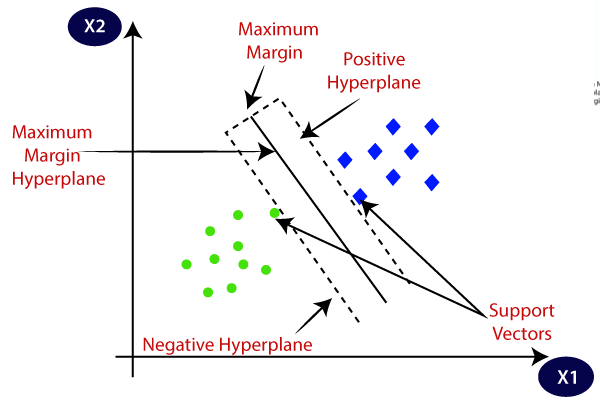

In [1]:
from IPython.display import Image
Image(filename='svm.png')

**Support Vector Machine Algorithm :-**
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, 
which is used for Classification as well as Regression problems. However, primarily, it 
is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can 
segregate n-dimensional space into classes so that we can easily put the new data point in 
the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. 
These extreme cases are called as support vectors, and hence algorithm is termed 
as Support Vector Machine. Consider the below diagram in which there are two different 
categories that are classified using a decision boundary or hyperplane:

#### Work- flow of  project

**1.Data Base --->2.Data pre-processing---->3.Train_test split----->4.Support Vector Machine Classifier**  

#### Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= [15,5]

### About the data set (Diabetes data)

The dataset contains information about Diabetes. The aim is to predict which patients are Diabetes or Non-diabetes.<br> Attribute information: 

**Pregnancies:** Number of times pregnant

**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure:** Diastolic blood pressure (mm Hg)

**SkinThickness:** Triceps skin fold thickness (mm)

**Insulin:** 2-Hour serum insulin (mu U/ml)

**BMI:** Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction:** Diabetes pedigree function

**Age:** Age (years)

**Outcome:** Class variable (0 or 1) 1 - reprsent Patient is Diabetic and 0 -represent Patient is non-Diabetic 

#### Problem Statement :- Using a machine learning that we can predict whether a person has diabetes or not

#### Data Collection and Analysis

In [3]:
#upload the data by using pandas
df_dia=pd.read_csv('diabetes.csv')

In [4]:
#first five observation
df_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#shape of the data
df_dia.shape       

(768, 9)

In [6]:
# we have total no 768 rows and 9 columns

In [7]:
#lets see the information of our data
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#all the data in our dataset is numerical datatypes which consist of float and int.

In [9]:
#lets see is there any duplicates values are there or not
df_dia.duplicated().sum()

0

In [10]:
#we have 0 values of duplicates data.

In [11]:
#Statistical Observation

In [12]:
df_dia.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [13]:
#if we see the minimum value for Glucose,Bloodpressure,Skinthickness,Insulin,Bmi are 0 this is not possible
#instead if 0 we will replace with nan values.

In [14]:
#Avg values of Glucose is-120, Bloodpressure is-69,bmi is -31 ,Age is - 33
#max age of costumer is 81 and minimum is 21


In [15]:
#lets replace the values with Nan

In [16]:
round(df_dia['BMI'].median())

32

In [17]:
df_dia['Glucose']=df_dia['Glucose'].replace(0,121)

In [18]:
df_dia['BloodPressure']=df_dia['BloodPressure'].replace(0,69)

In [19]:
df_dia['SkinThickness']=df_dia['SkinThickness'].replace(0,23)

In [20]:
df_dia['Insulin']=df_dia['Insulin'].replace(0,30)

In [21]:
df_dia['BMI']=df_dia['BMI'].replace(0,32)

In [22]:
#Is there any null values present in our data or not.
df_dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df_dia.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.250000,12.117203,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.408854,105.695978,14.000,30.00000,31.0000,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Visualize the data

**Univariates Analysis**

In [24]:
df_dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Figure size 1080x1440 with 0 Axes>

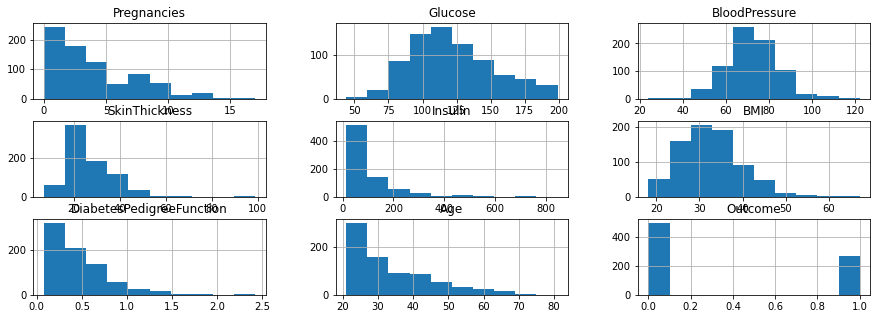

In [25]:
plt.figure(figsize=[15,20])
df_dia.hist()
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

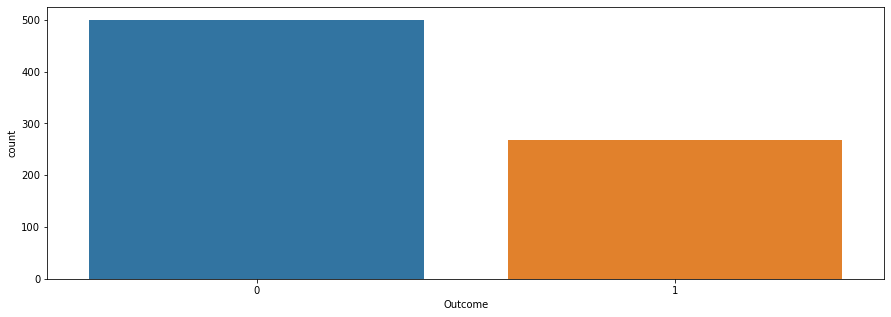

In [26]:
sns.countplot(df_dia['Outcome'])

In [27]:
#the above graph shows that the data is biased towards datapoints having outcome value as 0 where it mean that diabetes was
#not present actually.the number of non-diabetics is almost twice the number of diabetic patients.

**multivarites Analysis**

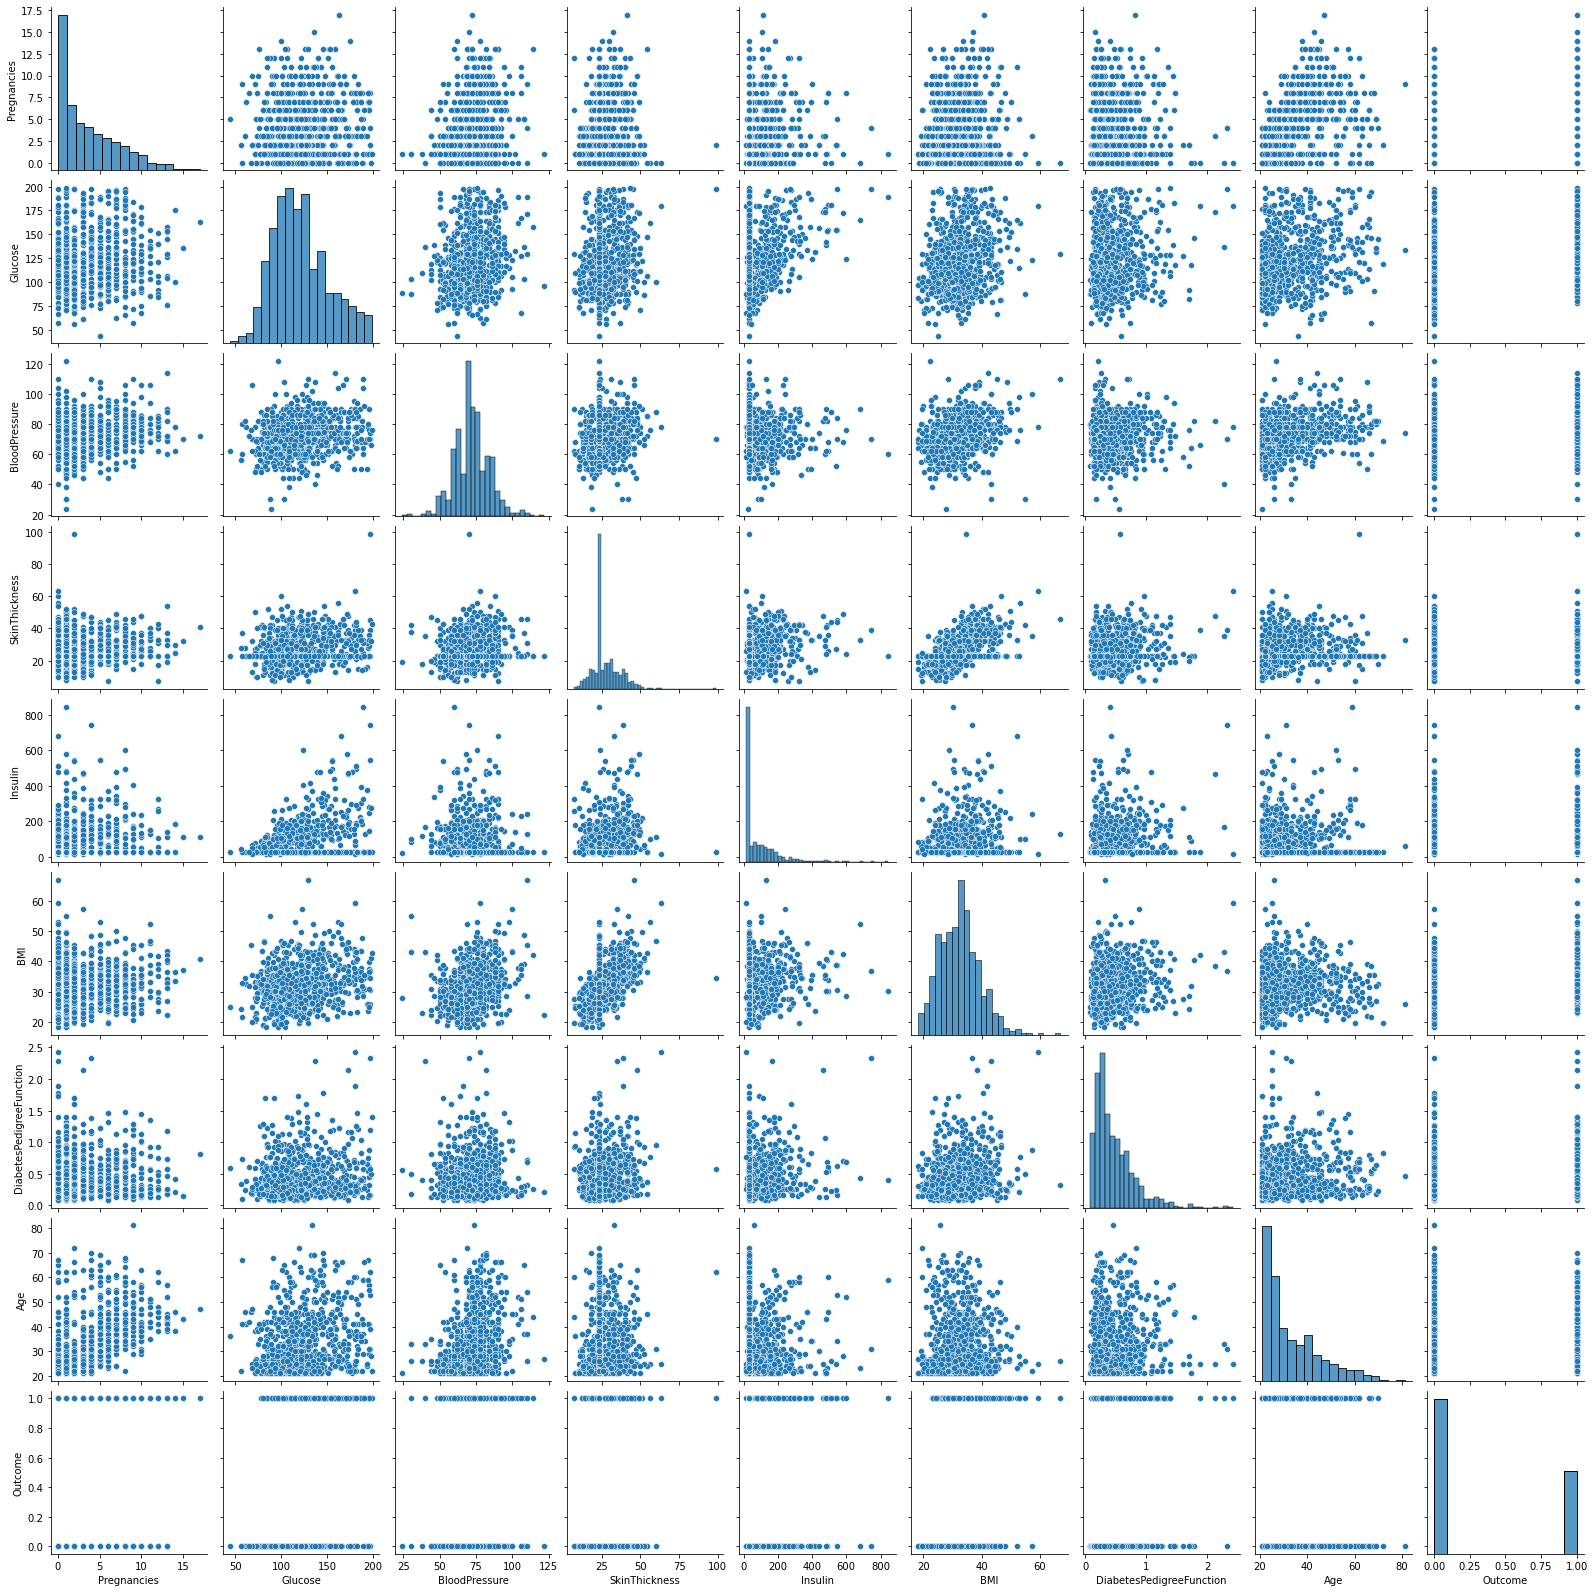

In [28]:
sns.pairplot(df_dia)

In [29]:
df_dia.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.706000,70.80600,26.058000,82.952000,30.880200,0.429734,31.190000
1,4.865672,142.160448,74.94403,29.716418,115.783582,35.381343,0.550500,37.067164


In [30]:
#if we come the features of people those have a diabetic with Non-Diabetic people we see the clearly major difference in
#values of Glucose which is difference of 32,Insuline difference of 33,DiabetesPedigreeFunction difference of 13

In [31]:
#heatmap

<AxesSubplot:>

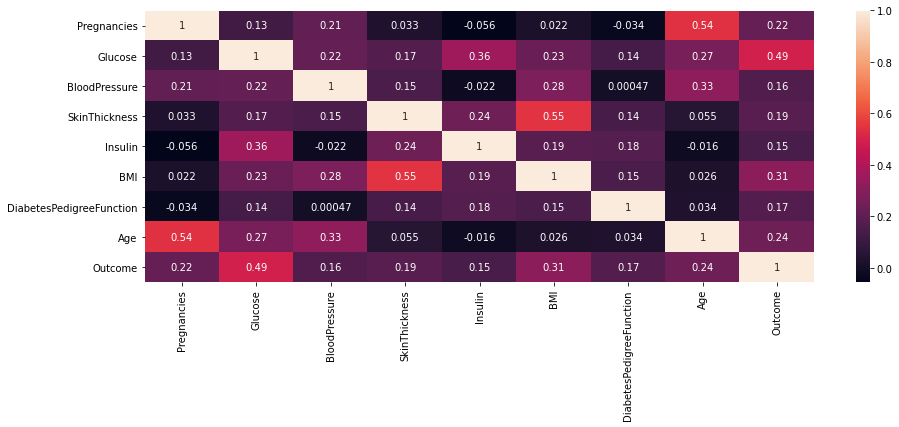

In [32]:
sns.heatmap(df_dia.corr(),annot=True)

In [33]:
#Glucose,BMi,Age shows the strong postive correlation.

#### model Building

In [34]:
#split the data in independent and dependent
X=df_dia.drop(columns=['Outcome'],axis=1)
y=df_dia['Outcome']


In [35]:
#lets scale the data to convert all the values of in one range. 
sc=StandardScaler()
sc.fit(X)


StandardScaler()

In [36]:
std_data=sc.transform(X)

In [37]:
print(std_data)

[[ 0.63994726  0.86525364 -0.02064527 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20601255 -0.51613175 ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01595708 -0.68129391 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02243187 -0.02064527 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14195434 -1.01161824 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94299462 -0.18580743 ... -0.29849289 -0.47378505
  -0.87137393]]


In [38]:
X=std_data
y=df_dia['Outcome']

In [39]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [40]:
#check the shape after split
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


**Train the model**

In [41]:
classifier=svm.SVC(kernel='linear')

In [42]:
#training the support vector machine classifier
classifier.fit(X_train,y_train)

SVC(kernel='linear')

**Model evalution**

In [43]:
#accuracy score on train data
X_train_pred=classifier.predict(X_train)
train_data_acc=accuracy_score(X_train_pred,y_train)

In [44]:
print('Accuracy score of the train data :-',train_data_acc)

Accuracy score of the train data :- 0.7817589576547231


In [45]:
#accuracy score on test data
X_test_pred=classifier.predict(X_test)
test_data_acc=accuracy_score(X_test_pred,y_test)

In [46]:
print('Accuracy score of the test data :-',test_data_acc)

Accuracy score of the test data :- 0.7792207792207793


**Making a predictive system**

In [47]:
#Blue print of our model

input_data=(1,85,66,29,30,26.6,0.351,31)

#change the input data to numpy array
input_data_as_numpy=np.asarray(input_data)

#reshape the data (bec oure model train on 768 rows, in this case we have 1 row our model get confuse it will take
#768 instead of 1 row)
input_data_reshape=input_data_as_numpy.reshape(1,-1)

#standardize the input data
standard_data=sc.transform(input_data_reshape)

print(standard_data)


prediction=classifier.predict(standard_data)
print(prediction)

if (prediction[0]==0):
    print('The person is not Diabetics')
else:
    print('The person is Diabetics')

[[-0.84488505 -1.20601255 -0.51613175  0.1805664  -0.6097756  -0.85155088
  -0.36506078 -0.19067191]]
[0]
The person is not Diabetics
